Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Anuj Gupta"
ID = "122561"

---

# Linear Regression

In this lab, we'll take a look at how to build and evaluate linear regression models. Linear regression works well when there is an (approximately) linear relationship between the features and the variable we're trying to predict.

Before we start, let's import the Python packages we'll need for the tutorial:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Univariate example
Here's an example from <code>[Tim Niven's tutorial at Kaggle](https://www.kaggle.com/timniven/linear-regression-tutorial)</code>.

### Background
We would like to perform *univariate* linear regression using a single feature $x$, "Number of hours studied," to predict a single dependent variable, $y$, "Exam score."

We can say that we want to regress <code>num_hours_studied</code> onto <code>exam_score</code> in order to obtain a model to predict a student's exam score using the number of hours he or she studied.

In the standard setting, we assume that the dependent variable (the exam score) is a random variable that has a Gaussian distribution whose mean is a linear function of the independent variable(s) (the number of hours studied) and whose variance is unknown but constant:

\begin{equation}
y\sim\mathcal{N}(\theta_0+\theta_1x,\sigma^2)
\end{equation}

Our model or hypothesis, then, will be a function predicting $y$ based on $x$:
\begin{equation}
h_\theta(x)=\theta_0+\theta_1x
\end{equation}

Next we'll do something very typical in machine learning experiment: generate some synthetic data for which we know the "correct" model, then use those data to test our algorithm for finding the best model.

So let's generate some example data and examine the relationship between $x$ and $y$:

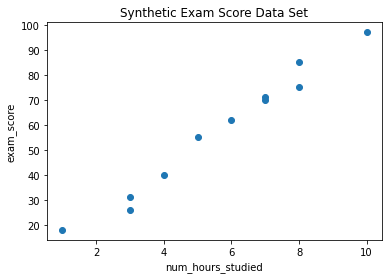

In [3]:
# Independent variable
num_hours_studied = np.array([1, 3, 3, 4, 5, 6, 7, 7, 8, 8, 10])

# Dependent variable
exam_score = np.array([18, 26, 31, 40, 55, 62, 71, 70, 75, 85, 97])

# Plot the data
plt.scatter(num_hours_studied, exam_score)
plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.title('Synthetic Exam Score Data Set')
plt.show()

### Design Matrix
The design matrix, usually written $\mathtt{X}$, contains our independent variables.

In general, with $m$ data points and $n$ features (independent variables), our design matrix will have $m$ rows and $n$ columns.

Note that we have a parameter $\theta_0$, which is the $y$-intercept term in our linear model. There is no independent variable to multiple $\theta_0$, so we will introduced a dummy variable always equal to 1 to represent the independent variable corresponding to $\theta_0$.

Putting the dummy variable and the number of hours studied together, we obtain the design matrix

\begin{equation}
\mathtt{X} = \begin{bmatrix}
    1 & 1\\
    1 & 3\\
    1 & 3\\
    1 & 4\\
    1 & 5\\
    1 & 6\\
    1 & 7\\
    1 & 7\\
    1 & 8\\
    1 & 8\\
    1 & 10\\
\end{bmatrix}
\end{equation} \
Notice that we do **not** include the dependent variable (exam score) in the design matrix.

In [4]:
# Add dummy variable for intercept term to design matrix.
# Understand the numpy insert function by reading https://numpy.org/doc/stable/reference/generated/numpy.insert.html

X = np.array([num_hours_studied]).T
X = np.insert(X, 0, 1, axis=1)
y = exam_score
print(X.shape)
print(y.shape)

(11, 2)
(11,)


### Hypothesis

Let's rewrite the hypothesis function now that we have a dummy variable for the intercept term in the model. We can write the independent variables including the dummy variable as a vector

$$\mathbf{x} = \begin{bmatrix} x_0 \\ x_1 \end{bmatrix}, $$

where $x_0 = 1$ is our dummy variable and $x_1$ is the number of hours studied. We also write the parameters as a vector

$$\mathbf{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix} .$$

Now we can conveniently write the hypothesis as

$$ h_\mathbf{\theta}(\mathbf{x}) = \mathbf{\theta}^\top \mathbf{x} . $$

### Exercise 1 (2 points)

Write a Python code function to evaluate a hypothesis $\mathbf{\theta}$ for an entire design matrix:

**Hint**: Use numpy function of <code>dot</code>

In [5]:
# Evaluate hypothesis over a design matrix

def h(X,theta):
    y_predicted = np.dot(X, theta)
    return y_predicted

In [6]:
print(h(X, np.array([0, 10])))

[ 10  30  30  40  50  60  70  70  80  80 100]


**Expected output**: [ 10,  30,  30,  40,  50,  60,  70,  70,  80,  80, 100]

### Cost function
How can we find the best value of $\mathbf{\theta}$? We need a cost function and an algorithm to minimize that cost function.

In a regression problem, we normally use squared error to measure the goodness of fit:

$$\begin{align}
\ J(\mathbf{\theta}) & = \frac{1}{2} \sum_{i=1}^{m}\left(h_\mathbf{\theta}\left(\mathbf{x}^{(i)}\right) - y^{(i)}\right)^2 \\
\                    & = \frac{1}{2} \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)^\top \left( \mathtt{X} \mathbf{\theta} - \mathbf{y} \right)
\end{align}$$
Here we've used $\mathtt{X}$ to denote the design matrix and $\mathbf{y}$ to denote the vector$$\begin{bmatrix} y_1 \\ \vdots \\ y_m \end{bmatrix} $$

We'll see in a moment how to minimize this cost function.

### Exercise 2 (2 points)

Let's implement **cost function** in Python by these steps:

 1. Calculate $dy = \hat{y} - y = \mathtt{X}\theta - y$
 2. Calcuate $cost = \frac{1}{2}{dy}^T{dy}$

In [7]:
m = y.shape[0]

def cost(theta, X, y):
    y_predicted = np.dot(X, theta)
    dy = y_predicted - y
    J = 0.5*np.dot(dy.T, dy)
    return J

In [8]:
print(cost(np.array([0, 10]), X, y))

85.0


**Expected output**: 85.0

### Aside: minimizing a convex function using the gradient

To solve our linear regression problem, we want to minimize the cost function $J(\mathbf{\theta})$ above with respect to the parameters $\mathbf{\theta}$.

$J$ is convex (see <code>[Wikipedia](https://en.wikipedia.org/wiki/Convex_function)</code> for an explanation) so it has just one minimum for some specific value of $\mathbf{\theta}$.

To find this minimum, we will find the point at which the gradient is equal to the zero vector.

The gradient of a multivariate function at a particular point is a vector pointing in the direction of maximum slope with a magnitude indicating the slope of the tangent at that point.

To make this clear, let's consider an example in which we consider the function $f(x) = 4x^2 - 6x + 11$ on the interval $[-10, 10]$ and plot its tangent lines at regular intervals.

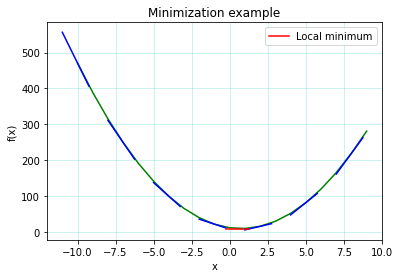

In [9]:
# Define range for plotting x
x = np.arange(-10, 10, 1)

# Example function f(x)
def f(x):
    return 4 * x * x - 6 * x + 11

# Plot f(x)
plt.plot(x, f(x), 'g')

# First derivative of f(x)
def dfx(x):
    return 8 * x - 6

# Plot tangent lines for f(x)
for i in np.arange(-10,10,3):
    x_i = np.arange(i - 1.0, i + 1.0, .25)
    m_i = dfx(i)
    c =  f(i) - m_i*i # c = y - mx
    #print(c)
    y_i = m_i*(x_i)  +  c
    plt.plot(x_i,y_i,'b')

# Plot tangent line at the minimum of f(x)
minimum = 0.75

for i in [minimum]:
    x_i = np.arange(i - 1, i + 1, .5)
    m_i = dfx(i)
    c = f(i) - m_i * i
    y_i = m_i * (x_i) + c
    plt.plot(x_i, y_i, 'r-', label='Local minimum')

# Decorate the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Minimization example')
plt.grid(axis='both',color='c', alpha=0.25)
plt.legend();
plt.show()

### Minimizing the cost function

Based on the previous example, we can see that to minimize our cost function, we just need to take the gradient with respect to $\mathbf{\theta}$ and determine where that gradient is equal to $\mathbf{0}$.

We have$$ J(\mathbf{\theta}) = \frac{1}{2} \sum_{i=1}^{m} \left(h_\mathbf{\theta}(\mathbf{x}^{(i)}) - y^{(i)}\right)^2 .$$This is a convex function of two variables ($\theta_0$ and $\theta_1$), so it has a single minimum where the gradient $\nabla_J(\mathbf{\theta})$ is $\mathbf{0}$.

Depending on the specific data, the cost function will look something like the surface plotted by the following code. Regardless of where we begin, the gradient always points "uphill," away from the global minimum.

C:\Users\anujg\AppData\Local\Temp/ipykernel_12356/3520349788.py:11: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


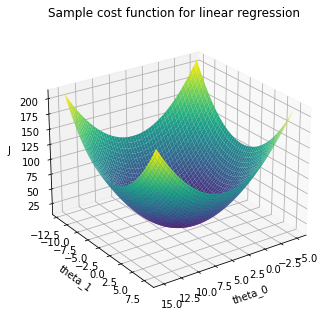

In [10]:
# Plot a sample 2D squared error cost function

from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-5.0, 15.0, 100)
x2 = np.linspace(-12.0, 8.0, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = (np.square(X1 - np.mean(X1)) + np.square(X2 - np.mean(X2))) + 10

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('J')
ax.set_title('Sample cost function for linear regression')
cm = plt.cm.get_cmap('viridis')
ax.plot_surface(X1, X2, Y, cmap=cm)
ax.view_init(elev=25, azim=55)
plt.show()

Take a look at the lecture notes. If you obtain the partial derivatives of the cost function $J$ with respect to $\mathbf{\theta}$, you get

$$ \nabla_J(\mathbf{\theta}) = \mathtt{X}^\top (\mathtt{X}\mathbf{\theta}-\mathbf{y}).$$

### Exercise 3 (2 points)

Write the gradient calculation in the equation above as a Python function:

In [11]:
# Gradient of cost function

def gradient(X, y, theta):
#     print("X=",X)
#     print("y=",y)
#     print("theta=",theta)
    grad = np.dot(X.T,(X @ theta - y))
    return grad

In [12]:
print(gradient(X, y, np.array([0, 10])))

[-10 -13]


**Expected output**: [-10, -13]

This means that if we currently had the parameter vector [0, 10] (where the cost is 85) and wanted to increase the cost, we could move in the direction [-10, -13]. On the other hand, if we wanted to decrease the cost (which of course we do), we should move in the opposite direction, i.e., [10, 13]. 

### Exercise 4 (2 points)

Implement this idea of gradient descent:

1. Calculate gradient from $X$, $y$ and $\theta$ using function <code>gradient</code>
2. Update $\theta_{new} = \theta + {\alpha}*grad$

In [13]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha*grad # MUST BE theta - alpha*grad (above is a mistake)
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

In [14]:
(theta, J_per_iter, gradient_per_iter) = gradient_descent(X, y, np.array([0, 10]), 0.001, 10)
print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

theta: [ 0.08327017 10.02116759]
J_per_iter: [84.775269   84.65958757 84.5793525  84.51074587 84.44605981 84.38279953
 84.32015717 84.25787073 84.19585485 84.13408132]
gradient_per_iter [[-10.         -13.        ]
 [ -9.084       -6.894     ]
 [ -8.556648    -3.421524  ]
 [ -8.25039038  -1.4471287 ]
 [ -8.06991411  -0.32491618]
 [ -7.96100025   0.31253312]
 [ -7.8928063    0.67422616]
 [ -7.84778746   0.87905671]
 [ -7.81596331   0.9946576 ]
 [ -7.79165648   1.05950182]]


**Expected output**: \
theta: [ 0.08327017 10.02116759]\
J_per_iter: [84.775269   84.65958757 84.5793525  84.51074587 84.44605981 84.38279953\
 84.32015717 84.25787073 84.19585485 84.13408132]\
gradient_per_iter [[-10.         -13.        ]\
 [ -9.084       -6.894     ]\
 [ -8.556648    -3.421524  ]\
 [ -8.25039038  -1.4471287 ]\
 [ -8.06991411  -0.32491618]\
 [ -7.96100025   0.31253312]\
 [ -7.8928063    0.67422616]\
 [ -7.84778746   0.87905671]\
 [ -7.81596331   0.9946576 ]\
 [ -7.79165648   1.05950182]]

In [15]:
# Optimize parameters theta on dataset X, y

theta_initial = np.array([0, 0])
alpha = 0.0001
iterations = 3000
theta, costs, grad = gradient_descent(X, y, theta_initial, alpha, iterations)
print('Optimal parameters: theta_0 %f theta_1 %f' % (theta[0], theta[1]))

Optimal parameters: theta_0 2.654577 theta_1 9.641848


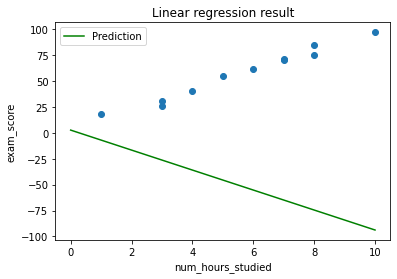

In [16]:
# Visualize the results

plt.scatter(num_hours_studied, exam_score)

x = np.linspace(0,10,20)
y_predicted = theta[0] - theta[1] * x
plt.plot(x, y_predicted, 'g', label='Prediction')

plt.xlabel('num_hours_studied')
plt.ylabel('exam_score')
plt.legend();
plt.title('Linear regression result')
plt.show()

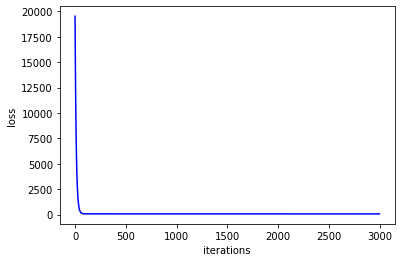

In [17]:
# Visualize the loss

x_loss = np.arange(0, iterations, 1)

plt.plot(x_loss, costs, 'b-')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.show()

## Excercise 5 (2 points)

Instead of repeating the code to plot the loss graph, we would like to encapsulate the code in a function.
Complete the loss plotting function below:

In [18]:
def cost_plot(iterations, costs):
    plt.scatter(num_hours_studied, exam_score)

    x = np.linspace(0,10,20)
    y_predicted = theta[0] - theta[1] * x
    plt.plot(x, y_predicted, 'g', label='Prediction')

    plt.xlabel('num_hours_studied')
    plt.ylabel('exam_score')
    plt.legend();
    plt.title('Linear regression result')
    plt.show()
    x_loss = np.arange(0, iterations, 1)

    plt.plot(x_loss, costs, 'b-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()

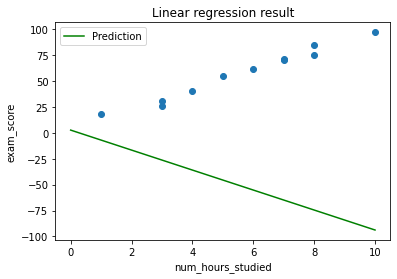

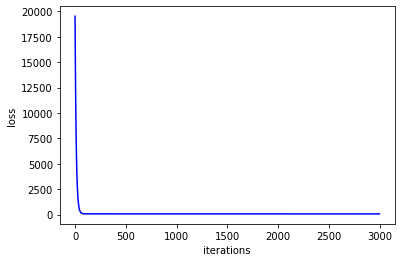

In [19]:
cost_plot(iterations, costs)

We can conclude from the loss curve that we have achieved convergence (the loss has stopped improving), and we can conclude that 3000 iterations is overkill! The loss is stable after 100 iterations or so.

### Goodness of fit
$R^2$ is a statistic that will give some information about the goodness of fit of a regression model. The $R^2$ coefficient of determination is 1 when the regression predictions perfectly fit the data. When $R^2$ is less than 1, it indicates the percentage of the variance in the target that is accounted for by the prediction.

$$\begin{align}
\ R^2 = 1 - \frac{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\hat{y}^\left(i\right) \right)^2}
{\sum_{i=1}^{m} \left( y^{\left(i\right)}-\bar{y}^\left(i\right) \right)^2}
\end{align}$$

### Exercise 6 (2 points)

Complete the `goodnees_of_fit` function implementing the equation for $R^2$ above:

In [20]:
def goodness_of_fit(y, y_predicted):
    r_square = 1- np.sum(((y-y_predicted)**2))/np.sum(((y-np.mean(y))**2))
    return (r_square)

In [21]:
y_predicted =  h(X, theta)
r_square = goodness_of_fit(y, y_predicted)
print(r_square)

0.9786239731773175


**Expected output**: 0.9786239731773175

An $R^2$ of 0.98 indicates an extremely good (outrageously good, in fact) fit to the data.

## Multivariate linear regression example

Next, we extend our model to multiple variables. We'll use a data set from Andrew Ng's class. The data include two independent variables,
"Square Feet" and "Number of Bedrooms," and the dependent variable is "Price."

Let's load the data:

In [22]:
# We use numpy's genfromtxt function to load the data from the text file.

raw_data = np.genfromtxt('..\Data\Housing_data.txt',delimiter = ',', dtype=str);

raw_data.shape

(48, 3)

Next, we split the raw data (currently strings) into headers and the data themselves:

In [23]:
# Extract headers and data
headers = raw_data[0,:];
print(headers)
data = np.array(raw_data[1:,:], dtype=float);

data.shape

['Square Feet' ' Number of bedrooms' 'Price']


(47, 3)

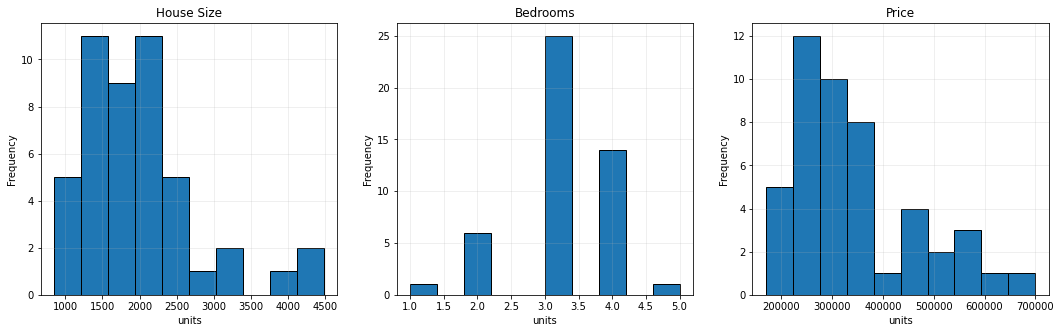

In [24]:
# Visualise the distribution of independent and dependent variables

# Make three subplots, in one row and three columns
fig, ax = plt.subplots(1,3)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,3,1)
plt2 = plt.subplot(1,3,2)
plt3 = plt.subplot(1,3,3)

# Variable 1: square footage
plt1.hist(data[:,0], label='Sq. feet', edgecolor='black')
plt1.set_title('House Size')
plt1.set_xlabel('units')
plt1.set_ylabel('Frequency')
plt1.grid(axis='both', alpha=.25)

# Variable 2: number of bedrooms
plt2.hist(data[:,1], label='Bedroom', edgecolor='black')
plt2.set_title('Bedrooms')
plt2.set_xlabel('units')
plt2.set_ylabel('Frequency')
plt2.grid(axis='both', alpha=.25)

# Variable 3: home price
plt3.hist(data[:,2], label='Price', edgecolor='black')
plt3.set_title('Price')
plt3.set_xlabel('units')
plt3.set_ylabel('Frequency')
plt3.grid(axis='both', alpha=.25)

### Normalization

We can see from the charts above that the independent variables and the dependent variables have very large differences in their ranges. If you try to use the gradient descent method on these data directly, you may have difficulty in finding a learning rate that is small enough that the costs will not grow out of control but is large enough that the number of iterations is not excessive.

Normalization of the independent and dependent variables can help with this.
One type of normalization, sometimes called "standardization" or "z-scaling,"
involves subtracting a variable's mean then dividing by its standard deviation,
calculated over the training samples. The result is a set of standardized variables,
each with a mean of 0 and a variance of 1 over the training set.


In [25]:
# Normalize the data

means = np.mean(data, axis=0)
#print(means,'\n')
stds = np.std(data, axis=0)
#print(stds)
data_norm = (data - means) / stds

In [26]:
# Extract y from the normalized dataset

y_label = 'Price'
y_index = np.where(headers == y_label)[0][0]
y = np.array([data_norm[:,y_index]]).T

# Extract X from normalized dataset

X = data_norm[:,0:y_index]

# Insert column of 1's for intercept term

X = np.insert(X, 0, 1, axis=1)

In [27]:
# Get number of examples (m) and number of parameters (n)
m = X.shape[0]
n = X.shape[1]
print(m, n)

47 3


### Excercise 7 (5 points)

Optimize the parameters using gradient descent:

In [28]:
theta_initial = np.zeros((X.shape[1],1))
alpha = 0.01
iterations = 1002
theta, costs, grad = gradient_descent(X, y, theta_initial, alpha, iterations)

'''
J_per_iter = np.zeros(iterations)
gradient_per_iter = np.zeros((iterations,len(theta)))
for iter in np.arange(iterations):
    grad = gradient(X, y, theta)
    theta = theta - alpha*grad # MUST BE theta - alpha*grad (above is a mistake)
    J_per_iter[iter] = cost(theta, X, y)
    gradient_per_iter[iter] = grad.T 
'''
print(theta)

[[-9.18709553e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]


In [29]:
print("X shape:",X.shape)
print("y shape:",y.shape)
print("theta shape:",theta.shape)
print("J_per_iter shape:", J_per_iter.shape)
print("gradient_per_iter shape:", gradient_per_iter.shape)

X shape: (47, 3)
y shape: (47, 1)
theta shape: (3, 1)
J_per_iter shape: (10,)
gradient_per_iter shape: (10, 2)


In [30]:
print('Theta values ', theta)

Theta values  [[-9.18709553e-17]
 [ 8.84765988e-01]
 [-5.31788197e-02]]


**Expected output**:\
Theta values  [[-9.15933995e-17]\
 [ 8.84765988e-01]\
 [-5.31788197e-02]]

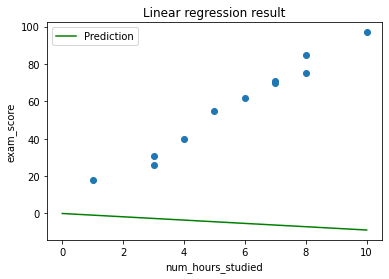

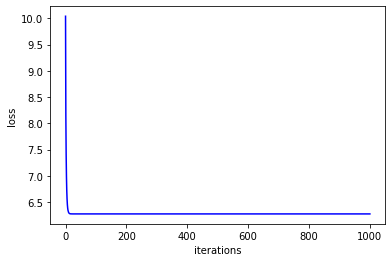

In [31]:
# Visualize the loss over the optimization
plt.title('Multivariate linear regression by gradient descent')
cost_plot(iterations, costs)

Transforming parameters back to the original scale
Now that we've got optimal parameters for our original data, we need to undo the normalization.

We have

$$\hat{y}^{\text{norm}} = \theta^\text{norm} \textbf{x}^\text{norm}$$

## Excercise 8 (3 points)

Modify the code to compute goodness of fit

In [32]:
# Goodness of fit
y_predicted = h(X,theta)
r_square = goodness_of_fit(y, y_predicted)

In [33]:
print(r_square)

0.7329450180289143


### Transform standardized data back to original scale
We can transform standardized predicted values, y_predicted into the orginal data scale using$$y_{\text{norm}} = \sigma_y y + \mu_y$$

In [34]:
# Compute mean and standard deviation of data

sigma = np.array(np.std(data,axis=0))
mu = np.array(np.mean(data,axis=0))

# De-normalize y

y_predicted =  np.round(h(X, theta) * sigma[2] + mu[2])

# Print first five values of y_predicted

print(y_predicted[0:5,:])

[[356283.]
 [286121.]
 [397489.]
 [269244.]
 [472278.]]


C:\Users\anujg\AppData\Local\Temp/ipykernel_12356/3345295611.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


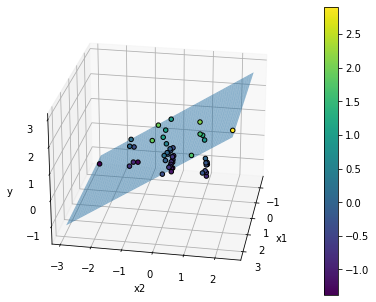

In [35]:
# 3D plot of standardized data

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,1],X[:,2],y,edgecolors='black',c=data_norm[:,2],alpha=1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X1 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))
X2 = np.linspace(min(X[:,2]), max(X[:,2]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)

yy = (theta[0] + theta[1]*xx1.T + theta[2]*xx2)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=10)
plt.colorbar(p)
plt.show()

## In-class exercises
Now that you're familiar with minimizing a cost function using its gradient and gradient descent, refer to the lecture notes to find the analytical solution (the normal equations) to the linear regression problem.

Implement the normal equation approach for the synthetic univariate data set and the housing price data set. Demonstrate your solution in the lab.

In [36]:
# just remove all parameters
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [37]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 2.1 (5 points)
Download raw_data and setup data

In [38]:
# Download raw_data and setup data
raw_data = np.genfromtxt('..\Data\Housing_data.txt',delimiter = ',', dtype=str);
headers = raw_data[0,:]
print(headers)
data = np.array(raw_data[1:,:], dtype=float);

['Square Feet' ' Number of bedrooms' 'Price']


In [39]:
print(data[:5])

[[2.104e+03 3.000e+00 3.999e+05]
 [1.600e+03 3.000e+00 3.299e+05]
 [2.400e+03 3.000e+00 3.690e+05]
 [1.416e+03 2.000e+00 2.320e+05]
 [3.000e+03 4.000e+00 5.399e+05]]


**Expected result**:\
[[2.104e+03 3.000e+00 3.999e+05]\
 [1.600e+03 3.000e+00 3.299e+05]\
 [2.400e+03 3.000e+00 3.690e+05]\
 [1.416e+03 2.000e+00 2.320e+05]\
 [3.000e+03 4.000e+00 5.399e+05]]

### Exercise 2.2 (5 points)
Normalized data

In [40]:
# Normalized data
def normalized_data(data):
    means = np.mean(data, axis=0)
    #print("means",means,'\n')
    stds = np.std(data, axis=0)
    #print("stds", stds)
    data_norm = (data - means) / stds
    return data_norm

In [41]:
data_norm = normalized_data(data)
print(data_norm[:5])

[[ 0.13141542 -0.22609337  0.48089023]
 [-0.5096407  -0.22609337 -0.08498338]
 [ 0.5079087  -0.22609337  0.23109745]
 [-0.74367706 -1.5543919  -0.87639804]
 [ 1.27107075  1.10220517  1.61263744]]


**Expected result**:\
[[ 0.13141542 -0.22609337  0.48089023]\
 [-0.5096407  -0.22609337 -0.08498338]\
 [ 0.5079087  -0.22609337  0.23109745]\
 [-0.74367706 -1.5543919  -0.87639804]\
 [ 1.27107075  1.10220517  1.61263744]]

### Exercise 2.3 (5 points)
Extract X and y from data

In [42]:
# Extract y from data
y = data_norm[:,-1]

In [43]:
print(y[:5])

[ 0.48089023 -0.08498338  0.23109745 -0.87639804  1.61263744]


**Expected result**: [ 0.48089023 -0.08498338  0.23109745 -0.87639804  1.61263744]

In [44]:
# Extract X from data
X = data_norm[:,0:2]
X = np.insert(X, 0, 1, axis=1)

In [45]:
print(X[:5,:])

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


**Expected result**:\
[[ 1.          0.13141542 -0.22609337]\
 [ 1.         -0.5096407  -0.22609337]\
 [ 1.          0.5079087  -0.22609337]\
 [ 1.         -0.74367706 -1.5543919 ]\
 [ 1.          1.27107075  1.10220517]]

### Exercise 2.4 (8 points)
Create h, cost, gradient, and gradient_descent

In [46]:
# create h function (hypothesis)
print(X.shape)
print(y.shape)

def h(X,theta):
    y_predicted = np.dot(X, theta)
    return y_predicted

(47, 3)
(47,)


In [47]:
print(h(X, np.array([1, 2, 4]))[:5])

[ 0.35845737 -0.92365487  1.11144393 -6.70492173  7.95096216]


**Expected result**: [ 0.35845737 -0.92365487  1.11144393 -6.70492173  7.95096216]

In [48]:
def cost(theta, X, y):
    y_predicted = h(X, theta)
    dy = y_predicted - y
    J = 0.5*np.dot(dy.T, dy)
    return J

In [49]:
print(cost(np.array([1, 8, 10]), X, y))

5477.13862837469


**Expected result**: 5477.138628374691

In [50]:
# Gradient of cost function
def gradient(X, y, theta):
    grad = np.dot(X.T,(X @ theta - y))
    return grad

In [51]:
print(gradient(X, y, np.array([1, 8, 10])))

[ 47.         599.00016917 659.76139633]


**Expected result**: [ 47.         599.00016917 659.76139633]

In [52]:
def gradient_descent(X, y, theta_initial, alpha, num_iters):
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta_initial)))
    # initialize theta
    theta = theta_initial
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha*grad
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

In [53]:
(theta, J_per_iter, gradient_per_iter) = gradient_descent(X, y, np.array([0, 1, 10]), 0.001, 10)
print("theta:", theta)
print("J_per_iter:", J_per_iter)
print("gradient_per_iter", gradient_per_iter)

theta: [-8.28226376e-16 -7.72838948e-01  6.35294636e+00]
J_per_iter: [2123.51284628 1873.56259758 1656.90935568 1468.93187452 1305.65834104
 1163.67477334 1040.04635308  932.24986509  838.11567544  755.77790087]
gradient_per_iter [[1.31450406e-13 2.70000169e+02 4.75532186e+02]
 [1.05693232e-13 2.44794887e+02 4.46076185e+02]
 [1.07025500e-13 2.21549490e+02 4.18667980e+02]
 [8.74855743e-14 2.00117968e+02 3.93159744e+02]
 [1.03916875e-13 1.80365065e+02 3.69414440e+02]
 [7.04991621e-14 1.62165488e+02 3.47305031e+02]
 [6.29496455e-14 1.45403177e+02 3.26713748e+02]
 [5.29576383e-14 1.29970626e+02 3.07531415e+02]
 [5.98410210e-14 1.15768253e+02 2.89656812e+02]
 [4.64073224e-14 1.02703825e+02 2.72996100e+02]]


**Expected result**:
theta: [-8.20787882e-16 -7.72838948e-01  6.35294636e+00]\
J_per_iter: [2123.51284628 1873.56259758 1656.90935568 1468.93187452 1305.65834104\
 1163.67477334 1040.04635308  932.24986509  838.11567544  755.77790087]\
gradient_per_iter [[1.31450406e-13 2.70000169e+02 4.75532186e+02]\
 [9.68114477e-14 2.44794887e+02 4.46076185e+02]\
 [9.63673585e-14 2.21549490e+02 4.18667980e+02]\
 [8.92619312e-14 2.00117968e+02 3.93159744e+02]\
 [1.11022302e-13 1.80365065e+02 3.69414440e+02]\
 [7.40518757e-14 1.62165488e+02 3.47305031e+02]\
 [5.05151476e-14 1.45403177e+02 3.26713748e+02]\
 [6.09512441e-14 1.29970626e+02 3.07531415e+02]\
 [6.29496455e-14 1.15768253e+02 2.89656812e+02]\
 [4.74065232e-14 1.02703825e+02 2.72996100e+02]]\

### Exercise 2.5 (5 points)

Do optimization using gradient descent with $\alpha = 0.003$ and 30,000 iterations

In [54]:
iterations = 30000
alpha = 0.003
theta, costs, grad = gradient_descent(X, y, np.array([0, 1, 10]), alpha, iterations)

In [55]:
print("theta:", theta)
print("cost_per_iter:", costs[-5:])
print("gradient_per_iter", grad[-5:])

theta: [-7.66053887e-17  8.84765988e-01 -5.31788197e-02]
cost_per_iter: [6.27579208 6.27579208 6.27579208 6.27579208 6.27579208]
gradient_per_iter [[ 3.05311332e-16 -1.78468351e-14  1.15185639e-15]
 [-1.38777878e-16 -1.78468351e-14  1.15185639e-15]
 [-1.38777878e-16 -1.78468351e-14  1.15185639e-15]
 [ 3.05311332e-16 -1.78468351e-14  1.15185639e-15]
 [-1.38777878e-16 -1.78468351e-14  1.15185639e-15]]


**Expected result**:\
theta: [-1.05832010e-16  8.84765988e-01 -5.31788197e-02]\
J_per_iter: [6.27579208 6.27579208 6.27579208 6.27579208 6.27579208]\
gradient_per_iter [[ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]\
 [ 0.00000000e+00 -1.72082220e-14  8.75724041e-16]]

### Exercise 2.6 (2 points)

Calculate goodness of fit

In [56]:
def goodness_of_fit(y, y_predicted):
    y = y.reshape(y.shape[0], )
    y_predicted = y_predicted.reshape(y_predicted.shape[0], )
    r_square = 1-np.sum(((y-y_predicted)**2))/np.sum(((y-np.mean(y))**2))
    return r_square

In [57]:
y_predicted =  h(X, theta)
r_square = goodness_of_fit(y, y_predicted)
print(r_square)

0.7329450180289143


**Expected result**: 0.7329450180289143

## Excercise 2.7 (2 point)

Plot graph of cost results

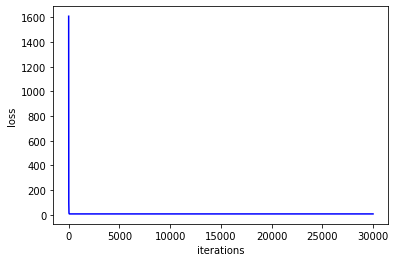

[1608.70177151 1103.17849679  780.92870684  571.95728502  433.46246468
  339.21428095  273.08861835  225.13018048  189.15455592  161.28706254
  139.07184377  120.92816642  105.81817434   93.0434771    82.1202813
   72.7024447    64.53380624   57.41843186   51.2018516    45.75906355
   40.98672506   36.79795294   33.11876516   29.88556861   27.04332527
   24.54416781   22.34632084   20.41323675   18.71288696   17.21716978
   15.90140858   14.74392189   13.72565231   12.82984426   12.04176318
   11.34845004   10.73850632   10.20190549    9.72982749    9.31451328
    8.94913711    8.62769414    8.34490167    8.09611225    7.87723731
    7.6846799     7.51527557    7.36624039    7.23512518    7.11977523]


In [58]:
def cost_plot(iterations, costs):

    x_loss = np.arange(0, iterations, 1)

    plt.plot(x_loss, costs, 'b-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
    
cost_plot(iterations, costs) # too many iterations!!
print(costs[:50])

### Exercise 2.8 (8 points)

Write a function implementing the normal equations for linear equation:

In [59]:
# Function to use the normal equations to find the optimal
# parameters for a linear regression model
def normal_equation(X, y):
    # initialize theta
    theta = np.ones((3,1))
    left = np.linalg.inv(np.dot(X.T, X))
    right = np.dot(X.T, y)
    theta = left @ right
    return theta

In [60]:
theta_norm = normal_equation(X,np.array([y]).T)
print("theta from normal equation:", theta_norm.T)
y_norm_predicted =  h(X, theta_norm)
r_norm_square = goodness_of_fit(y, y_norm_predicted)
print("r_square:", r_norm_square)

theta from normal equation: [[-7.76616596e-17  8.84765988e-01 -5.31788197e-02]]
r_square: 0.7329450180289143


**Expected result**:\
theta from normal equation: [[-7.90434550e-17  8.84765988e-01 -5.31788197e-02]]\
r_square: 0.7329450180289143

### Take-home exercise (40 points)
Find an interesting dataset for linear regression on Kaggle. Implement the normal equations and gradient descent then evaluate your model's performance.

Write a brief report on your experiments and results in the form of a Jupyter notebook.

Explain the dataset which you get and which rows which you use.
How many data in your dataset?

=================== ANSWER ======================

The dataset I have chosen contains the heights, lengths, and weights of 7 different species of fish. 3 different lengths, as well as the height will be used in order to predict the weight, which will be the y in this experiment. 

The initial dataset contains the name of the fish species in the first column. During the preprocessing stage, this was removed so that only float values remain in the training set. The training data contains 159 samples with 5 features. The data was scaled by normalizing it before being split into X and y of shapes (159, 5) and (159, ) respectively. Next, the intercept column was added to X making its final shape (159, 6). All the necessary functions for gradient descent as well as the normal equation were introduced, and the gradient descent was performed with 3,000 iterations and a learning rate of 0.001. As shown in the cost plot (Figure 1), the thetas were very quick to converge to a finalized value with the cost being very low for the vast majority of iterations. Only about 50 iterations are required for the cost to reach its lowest value hovering around 9.5.

The goodness of fit was tested by determining the R-squared value resulting in a value of 0.884. This is a very respectable result for a relatively small amount of data and proves this model has good performance. The same experiment was repeated but by using the normal equation and the corresponding R-squared value was equally high at 0.885 - both models were very successful.

In conclusion, using this dataset, the weights of fish in grams are successfuly able to be predicted with a high degree of accuracy based on the fish's lengths and heights.

Kaggle Dataset : https://www.kaggle.com/aungpyaeap/fish-market

Write down your all code at below.
Show the results, goodness of fit and plot cost graph

In [61]:
# just remove all parameters
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [62]:
import matplotlib.pyplot as plt
import numpy as np
# Download raw_data and setup data
fish_data = np.genfromtxt('..\Data\Fish.csv',delimiter = ',', dtype=str);
headers = fish_data[0,1:]
print(headers)
data = np.array(fish_data[1:,1:], dtype=float);
print("data shape:", data.shape)


['Weight' 'Length1' 'Length2' 'Length3' 'Height' 'Width']
data shape: (159, 6)


In [63]:
# Normalized data
def normalized_data(data):
    means = np.mean(data, axis=0)
    #print("means",means,'\n')
    stds = np.std(data, axis=0)
    #print("stds", stds)
    data_norm = (data - means) / stds
    return data_norm

data_norm = normalized_data(data)
print(data_norm[:5], data_norm.shape)

[[-0.43807217 -0.30578858 -0.28230301 -0.10602023  0.59657867 -0.23652895]
 [-0.30356218 -0.22550724 -0.19805366 -0.00233668  0.82126055 -0.06657895]
 [-0.16344761 -0.23554241 -0.17933159 -0.01097698  0.79734129  0.16579317]
 [-0.09899491  0.0053016   0.05469437  0.19639012  0.87977146  0.022621  ]
 [ 0.08875862  0.02537193  0.05469437  0.23959159  0.81283498  0.42637127]] (159, 6)


In [64]:
X = data_norm[:, 1:]
y = data_norm[:, 0]
X = np.insert(X, 0, 1, axis=1)
print(X[:5], X.shape)
print(y[:5], y.shape)

[[ 1.         -0.30578858 -0.28230301 -0.10602023  0.59657867 -0.23652895]
 [ 1.         -0.22550724 -0.19805366 -0.00233668  0.82126055 -0.06657895]
 [ 1.         -0.23554241 -0.17933159 -0.01097698  0.79734129  0.16579317]
 [ 1.          0.0053016   0.05469437  0.19639012  0.87977146  0.022621  ]
 [ 1.          0.02537193  0.05469437  0.23959159  0.81283498  0.42637127]] (159, 6)
[-0.43807217 -0.30356218 -0.16344761 -0.09899491  0.08875862] (159,)


In [65]:
def h(X,theta):
    y_predicted = np.dot(X, theta)
    return y_predicted

def cost(theta, X, y):
    y_predicted = h(X, theta)
    dy = y_predicted - y
    J = 0.5*np.dot(dy.T, dy)
    return J

def gradient(X, y, theta):
    grad = np.dot(X.T,(X @ theta - y))
    return grad

def gradient_descent(X, y, alpha, num_iters):
    theta = np.ones(X.shape[1])
    J_per_iter = np.zeros(num_iters)
    gradient_per_iter = np.zeros((num_iters,len(theta)))
    for iter in np.arange(num_iters):
        grad = gradient(X, y, theta)
        theta = theta - alpha*grad
        J_per_iter[iter] = cost(theta, X, y)
        gradient_per_iter[iter] = grad.T
    return (theta, J_per_iter, gradient_per_iter)

def normal_equation(X, y):
    # initialize theta
    theta = np.ones((3,1))
    left = np.linalg.inv(np.dot(X.T, X))
    right = np.dot(X.T, y)
    theta = left @ right
    return theta

In [66]:
iterations = 3000
alpha = 0.001
theta, costs, grad = gradient_descent(X, y, alpha, iterations)
print("theta:", theta)
print("J_per_iter:", costs)
print("gradient_per_iter", grad)

theta: [-1.19420318e-15  7.18169469e-01  3.74771676e-01 -4.68698348e-01
  2.38499586e-01  1.59199746e-01]
J_per_iter: [169.79433459  60.02559745  39.52472765 ...   9.20759046   9.2075556
   9.20752077]
gradient_per_iter [[ 1.59000000e+02  5.67354005e+02  5.70649359e+02  5.79558049e+02
   4.83004373e+02  5.60553064e+02]
 [ 1.33719000e+02  1.69733946e+02  1.71102291e+02  1.75398874e+02
   1.56195714e+02  1.72102633e+02]
 [ 1.12457679e+02  4.86303801e+01  4.93889716e+01  5.21836458e+01
   5.57461107e+01  5.33817362e+01]
 ...
 [-1.55431223e-15 -1.15870349e-01 -2.29727472e-02  1.41448196e-01
  -2.53795228e-02  1.64184376e-02]
 [-2.66453526e-15 -1.15846944e-01 -2.29592405e-02  1.41410720e-01
  -2.53729765e-02  1.64140705e-02]
 [ 2.66453526e-15 -1.15823544e-01 -2.29457376e-02  1.41373254e-01
  -2.53664319e-02  1.64097045e-02]]


In [67]:
def goodness_of_fit(y, y_predicted):
    y = y.reshape(y.shape[0], )
    y_predicted = y_predicted.reshape(y_predicted.shape[0], )
    r_square = 1-np.sum(((y-y_predicted)**2))/np.sum(((y-np.mean(y))**2))
    return r_square

y_predicted =  h(X, theta)
r_square = goodness_of_fit(y, y_predicted)
print("R SQAURED VALUE",r_square)

R SQAURED VALUE 0.8841821287150903


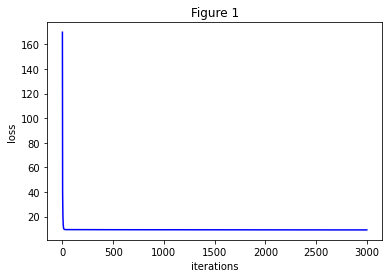

[169.79433459  60.02559745  39.52472765  30.32645212  24.29536727
  20.05750016  17.04877978  14.90786013  13.38234907  12.29375727
  11.51561362  10.95825093  10.55806412  10.26990988  10.06172681
   9.91072662   9.80069702   9.72009144   9.66067562   9.61656852
   9.58356228   9.55863988   9.53963289   9.52497836   9.51354609
   9.50451576   9.49728939   9.49142901   9.48661211   9.48259976
   9.47921377   9.47632035   9.47381821   9.47163011   9.46969659
   9.46797153   9.4664188    9.46500989   9.46372206   9.46253707
   9.4614401    9.4604191    9.45946412   9.45856693   9.45772068
   9.4569196    9.45615884   9.45543425   9.45474231   9.45408001]


In [68]:
def cost_plot(iterations, costs):

    x_loss = np.arange(0, iterations, 1)
    
    plt.title("Figure 1")
    plt.plot(x_loss, costs, 'b-')
    plt.xlabel('iterations')
    plt.ylabel('loss')
    plt.show()
    
cost_plot(iterations, costs) # too many iterations!!
print(costs[:50])

In [69]:
# Using NORMAL equation

def normal_equation(X, y):
    # initialize theta
    theta = np.ones((3,1))
    left = np.linalg.inv(np.dot(X.T, X))
    right = np.dot(X.T, y)
    theta = left @ right
    return theta

theta_norm = normal_equation(X,np.array([y]).T)
print("theta from normal equation:", theta_norm.T)
y_norm_predicted =  h(X, theta_norm)
r_norm_square = goodness_of_fit(y, y_norm_predicted)
print("r_square:", r_norm_square)

theta from normal equation: [[-2.44272374e-15  1.74125137e+00 -1.95382843e-01 -9.41402085e-01
   3.38814719e-01  1.05832073e-01]]
r_square: 0.8852867046546207
